In [1]:
# Importing required libraries
import os
import cv2 
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import random
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [2]:
#Storing path of the file to a variable filepath.
#dir = '/Users/Prab/Masters/SEM 2/5590 Python /Project/Data/Sign Language for Numbers'
dir = 'C:/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers'
#Setting the image size 
IMG_SIZE = 64

Label of below image is 0
Image size of zero_1.jpg is (72, 100, 3)


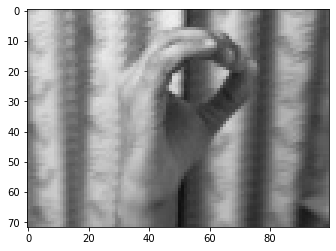

Printing the graysacle image


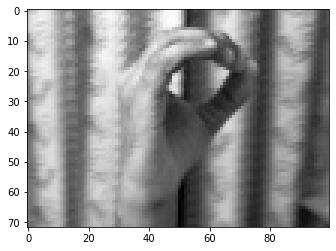

Resized image


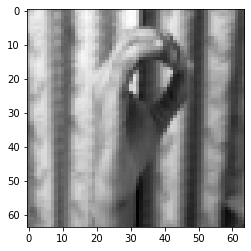

Label of below image is 1
Image size of one_1.jpg is (100, 58, 3)


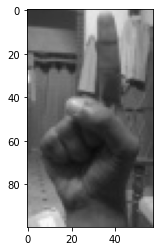

Printing the graysacle image


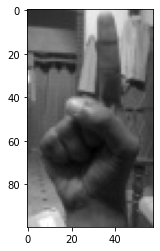

Resized image


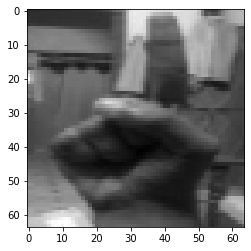

Label of below image is 2
Image size of two_1.jpg is (100, 69, 3)


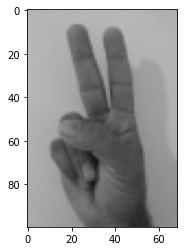

Printing the graysacle image


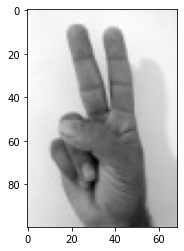

Resized image


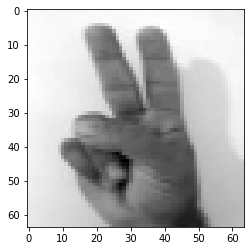

Label of below image is 3
Image size of three_1.jpg is (64, 64, 3)


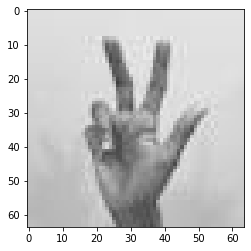

Printing the graysacle image


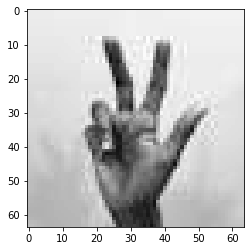

Resized image


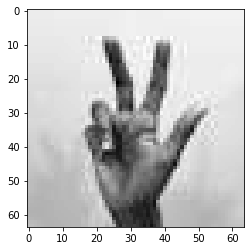

Label of below image is 4
Image size of four_1.jpg is (100, 100, 3)


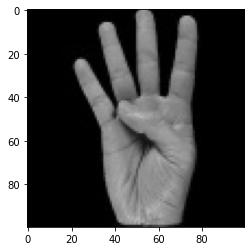

Printing the graysacle image


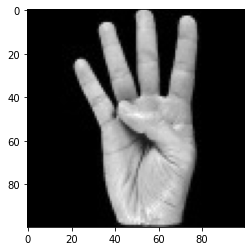

Resized image


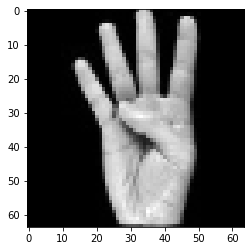

Label of below image is 5
Image size of five_1.jpg is (161, 100, 3)


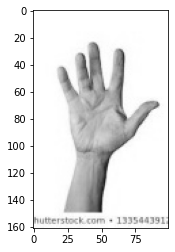

Printing the graysacle image


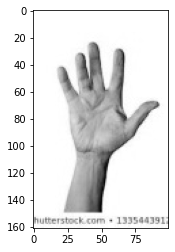

Resized image


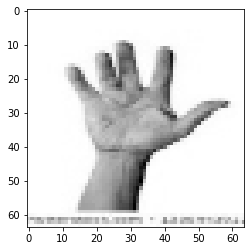

Label of below image is 6
Image size of six_1.jpg is (100, 100, 3)


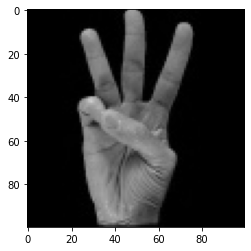

Printing the graysacle image


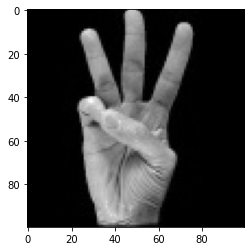

Resized image


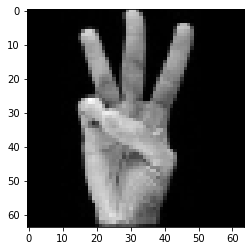

Label of below image is 7
Image size of seven_1.jpg is (100, 100, 3)


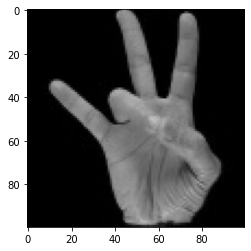

Printing the graysacle image


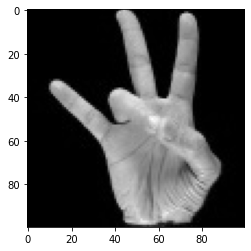

Resized image


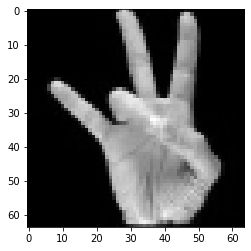

Label of below image is 8
Image size of eight_1.jpg is (100, 100, 3)


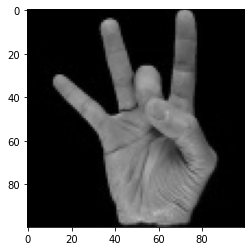

Printing the graysacle image


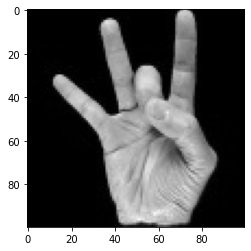

Resized image


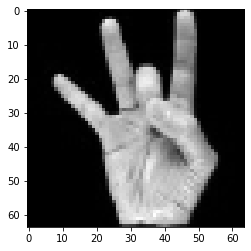

Label of below image is 9
Image size of nine_1.jpg is (100, 56, 3)


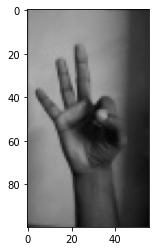

Printing the graysacle image


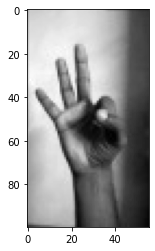

Resized image


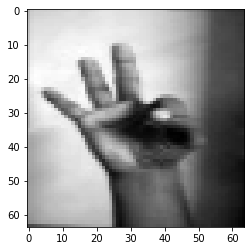

Label of below image is unknown
Image size of unknown_1.jpg is (74, 100, 3)


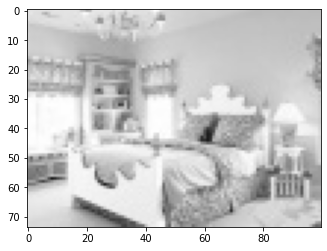

Printing the graysacle image


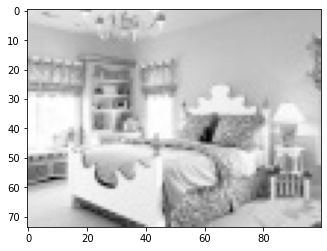

Resized image


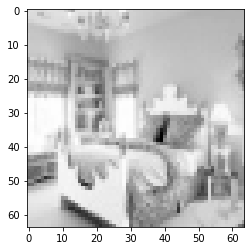

In [3]:
# Input data calsses
CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "unknown"]

#Visualizing the first image of each category 
for category in CATEGORIES:
    path = os.path.join(dir,category)  # create path to categories
    for img in os.listdir(path):
      # iterate over each image
      # convert to array 
      print('Label of below image is {}'.format(category))
      img_array = cv2.imread(os.path.join(path,img))
      print('Image size of {} is {}'.format(img, img_array.shape)) 
      plt.imshow(img_array, cmap = None)  # graph it
      plt.show()  # display! 

      print('Printing the graysacle image')
      img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
      plt.imshow(img_array, cmap='gray')  # graph it
      plt.show()  # display! 
      print('Resized image')
      img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      plt.imshow(img_array, cmap='gray')
      plt.show() # Show resize image
      break  # we just want one for now so break

In [4]:
# Defining a funcation to read image data, resizing and convering to required format
def get_images(directory):
    output = []
    print("Loading {}".format(directory))
    
    # Iterate through each folder corresponding to a category
    for category in CATEGORIES:
        path = os.path.join(directory,category)  # create path to categories
        class_num = CATEGORIES.index(category)  # get the classification
        print('Processing folder {}'.format(category))
        # Iterate through each image in folder
        for file in tqdm(os.listdir(path)):
          # Get the path name of the image
          img_path = os.path.join(path, file)
          # Open and read the image in grayscale
          image_array = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
          # Resize the image
          image_resize = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))  
          #print('type of Image', type(Images))
          #print('type of image', type(image))
          # Append the image and its corresponding label to the output
          output.append([image_resize, class_num])
        #Images = np.array(Images, dtype = 'float32')
        #Labels = np.array(Labels, dtype = 'int32')   
    return output

In [5]:
# Loading input image data in list
image_with_label = get_images(dir)

  2%|█▊                                                                             | 35/1500 [00:00<00:04, 349.14it/s]

Loading C:/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers
Processing folder 0


  2%|█▋                                                                             | 33/1500 [00:00<00:04, 324.32it/s]

Processing folder 1


  3%|██▍                                                                            | 47/1500 [00:00<00:03, 466.59it/s]

Processing folder 2


  4%|██▊                                                                            | 53/1500 [00:00<00:02, 526.15it/s]

Processing folder 3


  6%|████▌                                                                          | 86/1500 [00:00<00:03, 409.93it/s]

Processing folder 4


  7%|█████▏                                                                         | 98/1500 [00:00<00:03, 451.44it/s]

Processing folder 5


  3%|██▎                                                                            | 43/1500 [00:00<00:03, 426.88it/s]

Processing folder 6


  3%|██▎                                                                            | 44/1500 [00:00<00:03, 432.55it/s]

Processing folder 7


  1%|▋                                                                              | 12/1500 [00:00<00:12, 117.96it/s]

Processing folder 8


  2%|█▎                                                                             | 25/1500 [00:00<00:06, 241.04it/s]

Processing folder 9


  3%|██▎                                                                            | 43/1500 [00:00<00:03, 422.40it/s]

Processing folder unknown


100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:02<00:00, 562.62it/s]


In [6]:
# Checking input data length
len(image_with_label)

16500

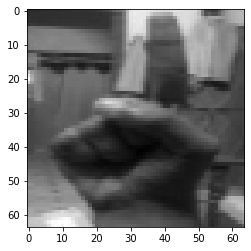

In [7]:
# Plotting image from input data
plt.imshow(image_with_label[1500][0], cmap='gray')  # graph it

In [8]:
# Input data lebel length
len(image_with_label[0][0])

64

In [9]:
# Printing image data at position 0 
print(image_with_label[0])

[array([[173, 190, 209, ..., 109,  81,  82],
       [190, 204, 219, ..., 108,  79,  83],
       [197, 217, 221, ..., 105,  76,  81],
       ...,
       [117, 119, 114, ...,  55,  80,  98],
       [111, 116, 121, ...,  57,  74,  82],
       [108, 117, 133, ...,  65,  74,  64]], dtype=uint8), 0]


In [10]:
# Print image data at poisiton 15000
print(image_with_label[15000])

[array([[226, 226, 224, ..., 187, 187, 187],
       [227, 223, 222, ..., 188, 188, 188],
       [223, 222, 223, ..., 189, 189, 189],
       ...,
       [223, 220, 219, ..., 212, 210, 212],
       [218, 216, 216, ..., 213, 205, 171],
       [219, 216, 216, ..., 199, 136, 114]], dtype=uint8), 10]


In [11]:
# performing randon suffle
random.shuffle(image_with_label)

# Checking sample data
for sample in image_with_label[:10]:
    print(sample[1])

8
10
5
6
3
9
3
3
10
10


In [12]:
# Splitting input data images into X (features)and Y (label)
X = []
Y = []

for features,label in image_with_label:
    X.append(features)
    Y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[135]
   [137]
   [140]
   ...
   [131]
   [129]
   [127]]

  [[136]
   [139]
   [142]
   ...
   [133]
   [131]
   [129]]

  [[138]
   [141]
   [144]
   ...
   [135]
   [133]
   [131]]

  ...

  [[122]
   [123]
   [125]
   ...
   [110]
   [109]
   [107]]

  [[120]
   [120]
   [122]
   ...
   [108]
   [106]
   [105]]

  [[117]
   [117]
   [119]
   ...
   [106]
   [104]
   [103]]]]


In [13]:
Y

[8,
 10,
 5,
 6,
 3,
 9,
 3,
 3,
 10,
 10,
 8,
 0,
 3,
 2,
 8,
 3,
 1,
 3,
 3,
 2,
 6,
 2,
 3,
 0,
 10,
 4,
 4,
 6,
 1,
 10,
 1,
 9,
 7,
 3,
 9,
 9,
 5,
 8,
 8,
 4,
 7,
 2,
 5,
 2,
 2,
 5,
 0,
 10,
 7,
 2,
 1,
 10,
 4,
 6,
 7,
 4,
 6,
 3,
 3,
 1,
 5,
 8,
 3,
 2,
 2,
 2,
 8,
 2,
 0,
 0,
 4,
 4,
 5,
 2,
 3,
 10,
 1,
 7,
 5,
 7,
 10,
 6,
 7,
 6,
 7,
 6,
 9,
 2,
 7,
 2,
 6,
 9,
 8,
 2,
 5,
 3,
 1,
 2,
 2,
 9,
 9,
 9,
 2,
 10,
 6,
 5,
 3,
 2,
 6,
 1,
 5,
 3,
 4,
 2,
 8,
 6,
 6,
 1,
 7,
 7,
 9,
 8,
 10,
 9,
 5,
 8,
 2,
 0,
 7,
 0,
 9,
 3,
 6,
 0,
 8,
 2,
 1,
 0,
 8,
 4,
 7,
 5,
 7,
 7,
 1,
 4,
 7,
 4,
 9,
 0,
 0,
 7,
 10,
 4,
 6,
 2,
 10,
 0,
 0,
 1,
 0,
 6,
 4,
 5,
 0,
 2,
 9,
 3,
 3,
 9,
 7,
 7,
 5,
 0,
 5,
 2,
 4,
 5,
 2,
 8,
 4,
 5,
 1,
 4,
 8,
 9,
 1,
 9,
 6,
 6,
 10,
 0,
 10,
 6,
 5,
 1,
 2,
 1,
 5,
 0,
 8,
 6,
 10,
 4,
 6,
 2,
 0,
 10,
 9,
 6,
 3,
 7,
 1,
 9,
 5,
 6,
 6,
 7,
 3,
 4,
 0,
 9,
 7,
 2,
 6,
 4,
 0,
 1,
 3,
 0,
 1,
 2,
 10,
 4,
 5,
 5,
 2,
 4,
 8,
 0,
 10,
 9,
 8,
 6,
 6,
 

In [15]:
# Using pickle to serialize the data
import pickle
pickle_out = open("C:/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("C:/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers/Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [17]:
# Loading pickel data
pickle_in = open("C:/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers/X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_in = open("C:/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers/Y.pickle","rb")
Y = pickle.load(pickle_in)
Y = np.array(Y)

# Normalizing the data
X = X/255.0

# Defining sequential model (CNN) -- Model1
model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax')) # size must be equal to number of classes i.e. 11
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Fitting model on training data
model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
413/413 [==============================] - 59s 143ms/step - loss: 1.7246 - accuracy: 0.3975 - val_loss: 0.7890 - val_accuracy: 0.7609
Epoch 2/10
413/413 [==============================] - 47s 113ms/step - loss: 0.6396 - accuracy: 0.7938 - val_loss: 0.4643 - val_accuracy: 0.8479
Epoch 3/10
413/413 [==============================] - 41s 100ms/step - loss: 0.4021 - accuracy: 0.8715 - val_loss: 0.3242 - val_accuracy: 0.9024
Epoch 4/10
413/413 [==============================] - 42s 102ms/step - loss: 0.2771 - accuracy: 0.9124 - val_loss: 0.2395 - val_accuracy: 0.9303
Epoch 5/10
413/413 [==============================] - 41s 100ms/step - loss: 0.2060 - accuracy: 0.9353 - val_loss: 0.2217 - val_accuracy: 0.9303
Epoch 6/10
413/413 [==============================] - 42s 102ms/step - loss: 0.1483 - accuracy: 0.9536 - val_loss: 0.1733 - val_accuracy: 0.9485
Epoch 7/10
413/413 [==============================] - 39s 94ms/step - loss: 0.1283 - accuracy: 0.9589 - val_loss: 0.1875 - val_acc

In [ ]:
model.save("C:/Users/vshaikh/OneDrive - Capgemini/Desktop/Py/Project/Sign Language for Numbers/model.h5")